In [1]:
#Hier weren die Daten geladen

import numpy as np
import os

#Directory an dem die Daten sind
directory = "/home/jovyan/Praktikum_P2/240_Hysterese" #Directory
Messdaten = "240bNeukurve.txt" #Dateiname

#Directory Festlegen und anzeigen
os.chdir(directory) #geht ins gewünschte Directory
directory_path = os.getcwd() #Derzeitiges Directory
print("My current directory is : " + directory_path)
folder_name = os.path.basename(directory_path) #Derzeitiger Ordner
print("My directory name is : " + folder_name)

#Daten Laden und ausgeben
data = np.loadtxt(Messdaten)
print(data) 

#Spalten der Datei auslesen
columb1 = data[:,0] #1.Spalte
columb2 = data[:,1] #2.Spalte
columb3 = data[:,2] #3.Spalte

My current directory is : /home/jovyan/Praktikum_P2/240_Hysterese
My directory name is : 240_Hysterese
[[ 0.0000e+00  0.0000e+00 -1.0000e+00         nan]
 [ 0.0000e+00 -1.5000e-03 -1.0000e+00         nan]
 [ 1.0000e-01  0.0000e+00 -1.5000e+00         nan]
 [ 2.0100e-01 -1.5000e-03 -1.0000e+00         nan]
 [ 3.0100e-01 -1.5000e-03 -1.5000e+00         nan]
 [ 4.0100e-01 -1.5000e-03 -1.0000e+00         nan]
 [ 5.0100e-01  0.0000e+00 -1.5000e+00         nan]
 [ 6.0100e-01  1.5000e-03 -1.5000e+00         nan]
 [ 7.0100e-01  0.0000e+00 -1.0000e+00         nan]
 [ 8.0100e-01  0.0000e+00 -1.0000e+00         nan]
 [ 9.0100e-01 -1.5000e-03 -1.0000e+00         nan]
 [ 1.0010e+00  0.0000e+00 -1.0000e+00         nan]
 [ 1.1010e+00  0.0000e+00 -1.0000e+00         nan]
 [ 1.2010e+00 -1.5000e-03 -1.0000e+00         nan]
 [ 1.3010e+00  0.0000e+00 -1.0000e+00         nan]
 [ 1.4010e+00  0.0000e+00 -1.0000e+00         nan]
 [ 1.5010e+00 -1.5000e-03 -1.0000e+00         nan]
 [ 1.6010e+00  1.5000e-03 -1.0

In [2]:
#Hier werden die Werte für die Aufgabe berechnet

import numpy as np

#240_b

#gemessene Werte
t = columb1
print("Zeit t:", t)
#print("Lenght t:", len(t))

I = columb2
print("Stromstaerke I:", I)
#print("Length I:", len(I))

B = (-columb3)/1000 #umrechnung in Tesla (SI-Einweit, damit die Formeln stimmen) und Graph an x-Achse
print("Magnetische Flussdichte B:", B)
#print("Lenght B:", len(B))

#gegebene Werte für die Formlen:
N = 2*500 #Gesammtwindungszahl aus 2 Spule zusammengesetzt
l_Fe = 0.477 #Länge eines Weges durch die Mitte des Eisenkerns in Meter (Laut Anleitung: 477 +- 4mm)
My_0 = 1.25663706212e-6 #in N/A^-2 , Literaturwert https://physics.nist.gov/cgi-bin/cuu/Value?mu0 (Stand 02.11.2022)
d = 0.002 #Dicke des Spaltes in Meter (Laut Anleitung: 2 +- 0,05 mm)

#Berechnung der magnetischen Feldstärke
H = ((N*I)/l_Fe)-(d/(My_0*l_Fe))*B #Formel: 240.2 S.50
print("Magnetische Feldstärke H:", H)

#Fehlerrechnung
N_err = 0 #0, da Natürliche Zahl
print("Fehler auf N:", N_err)
l_Fe_err=4/1000 # in Meter
print("Fehler auf l_Fe:", l_Fe_err)
My_0_err= 1.9*10**(-10)*10**(-6) #in N/A^-2 , Literaturwert https://physics.nist.gov/cgi-bin/cuu/Value?mu0 (Stand 02.11.2022)
print("Fehler auf My_0:", My_0_err)
d_err=0.05/1000 # in Meter
print("Fehler auf d:", d_err)
I_err=I*0.01 #1% des Messwertes
print("Fehler auf I:", I_err)
B_err=B*0.03 #3% des Messwertes bei 20°C
print("Fehler auf B:", B_err)

#Fehlerquadrate der einzelnen Ableitungen(Teilergebnisse für H_err)
s1 = (N/l_Fe)*I_err #H nach I ableiten
s2 = (-B/(My_0*l_Fe))*d_err #H nach d ableiten
s3 = (-d/(My_0*l_Fe))*B_err #H nach B ableiten
s4 = ((B*d-I*My_0*N)/(My_0*l_Fe**2))*l_Fe_err #H nach l_Fe ableiten
s5 = ((d)/(My_0**2*l_Fe))*My_0_err #H nach My0 ableiten


#Fehler auf die magnetische Fledstärke
H_err = (s1**2+s2**2+s3**2+s4**2+s5**2)**(1/2)
print("Fehler auf H:", H_err)

Zeit t: [ 0.     0.     0.1    0.201  0.301  0.401  0.501  0.601  0.701  0.801
  0.901  1.001  1.101  1.201  1.301  1.401  1.501  1.601  1.701  1.801
  1.901  2.001  2.101  2.201  2.301  2.401  2.501  2.601  2.701  2.801
  2.901  3.001  3.101  3.201  3.301  3.401  3.501  3.601  3.701  3.801
  3.901  4.001  4.101  4.201  4.301  4.401  4.501  4.601  4.701  4.801
  4.901  5.001  5.101  5.201  5.301  5.401  5.501  5.601  5.701  5.801
  5.901  6.001  6.101  6.201  6.301  6.401  6.501  6.601  6.701  6.801
  6.901  7.001  7.101  7.201  7.301  7.401  7.501  7.601  7.701  7.801
  7.901  8.001  8.101  8.201  8.301  8.401  8.501  8.601  8.701  8.801
  8.901  9.001  9.101  9.201  9.301  9.401  9.501  9.601  9.701  9.801
  9.901 10.001 10.101 10.201 10.301 10.401 10.501 10.601 10.701 10.801
 10.901 11.001 11.101 11.201 11.301 11.401 11.501 11.601 11.701 11.801
 11.901 12.001 12.101 12.201 12.301 12.401 12.501 12.601 12.701 12.801
 12.901 13.001 13.101 13.201 13.301 13.401 13.501 13.601 13.701 13.80

My_max: 433.6972196893206
Fehler auf My_max: 31.830988601051054


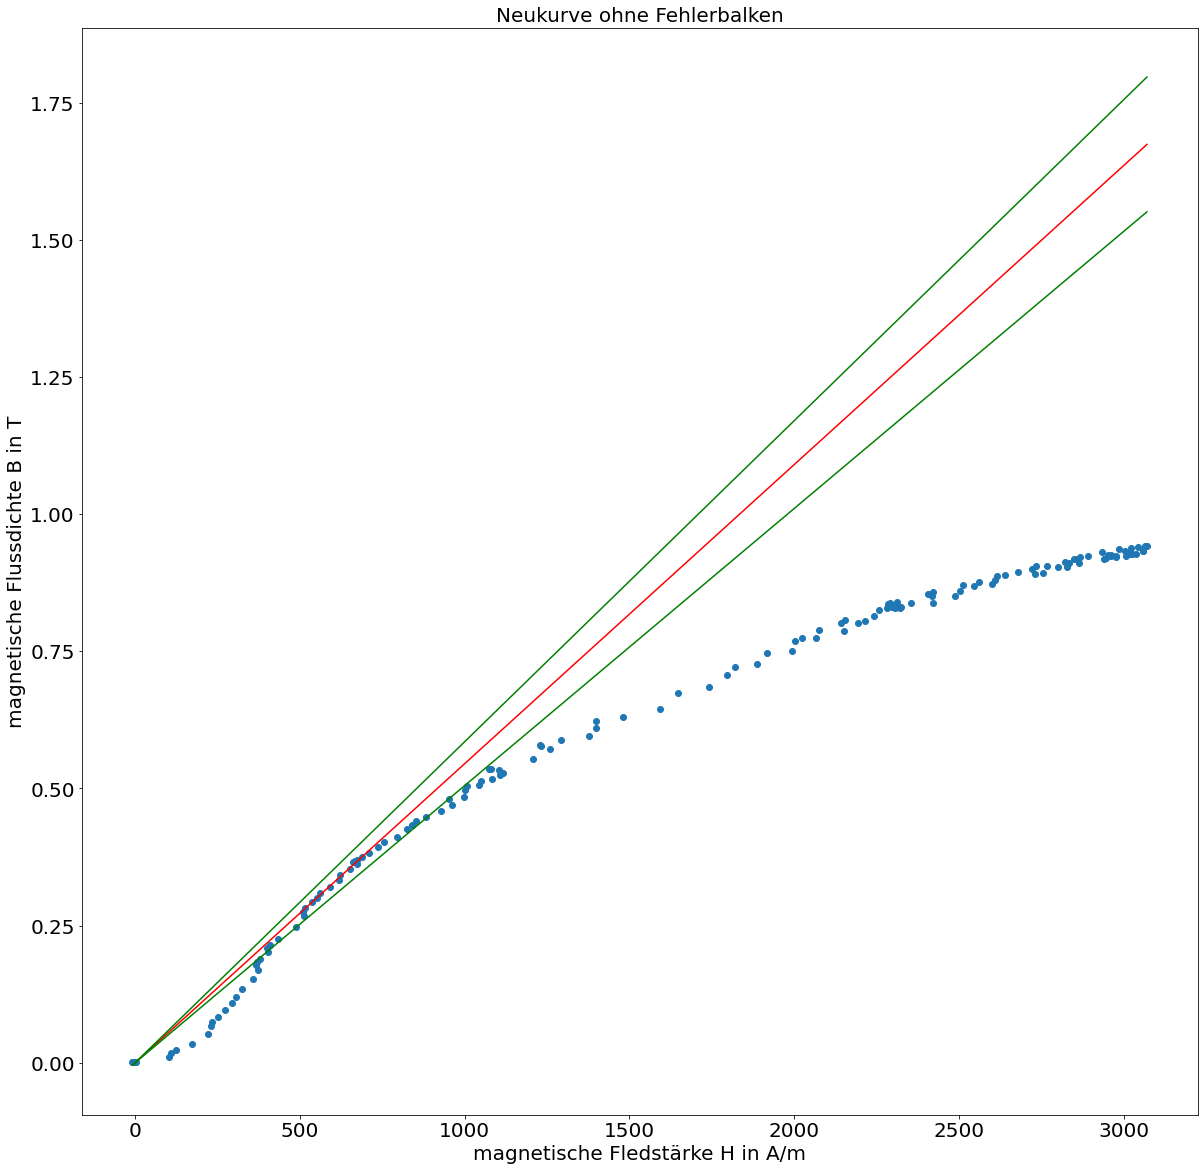

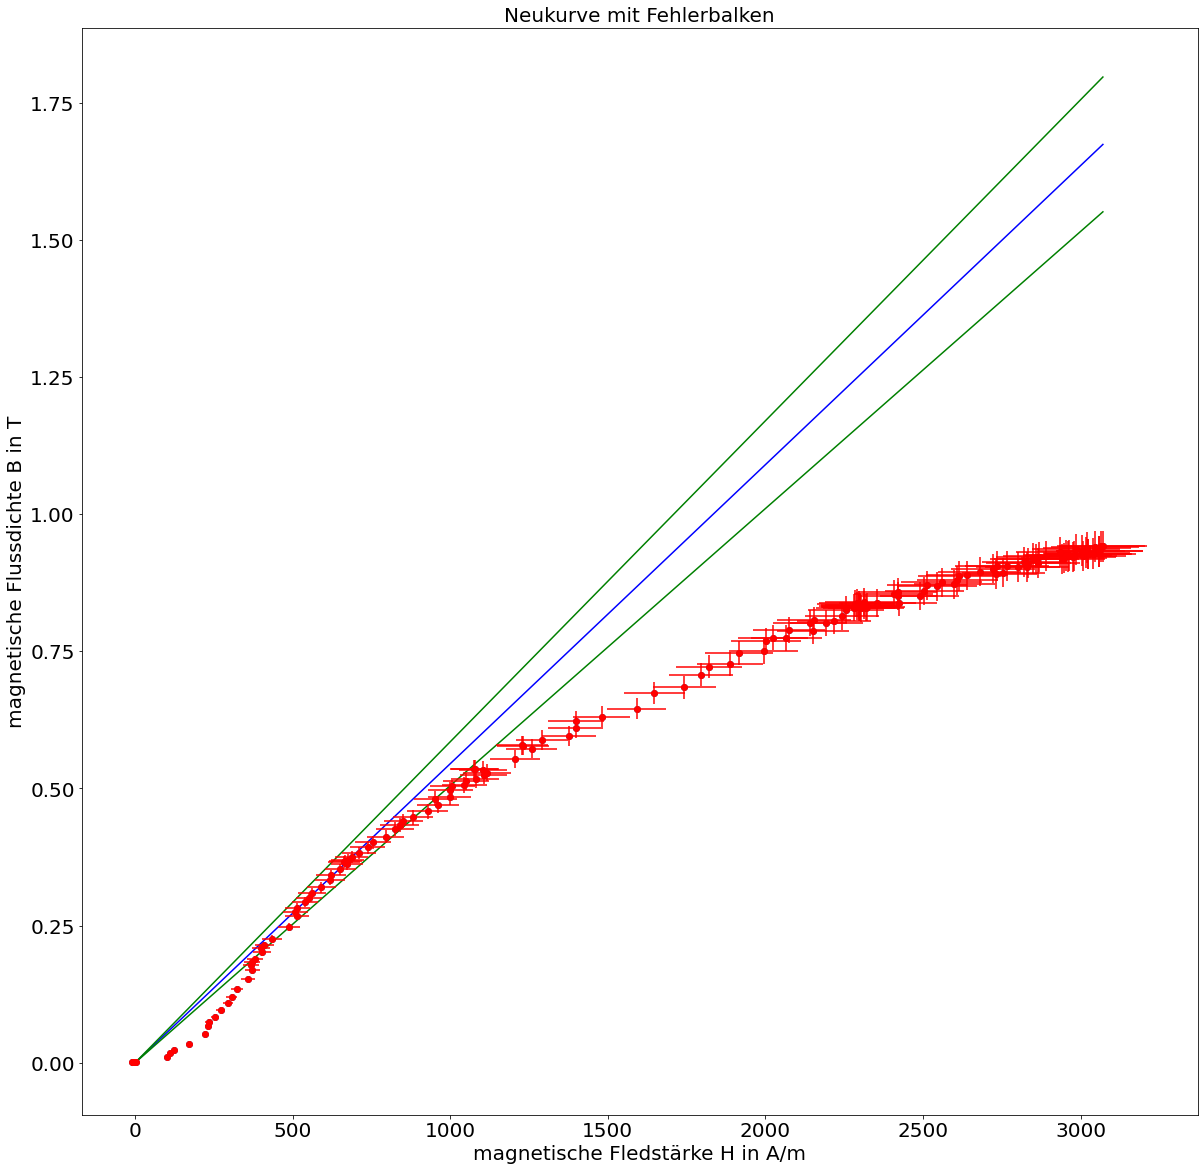

In [3]:
#Hier wird der Plot erstellt

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

Steigung = 5.45*10**(-4)
Steigung_max = 5.85*10**(-4)
Steigung_min = 5.05*10**(-4)

#Plot ohne Fehlerbalken
plt.figure(figsize=(20,20)) #Größe des Bildes
plt.scatter(H,B) #eigentlicher Plot
plt.plot(H, Steigung*H, linestyle='solid', color = "r") #Tangente zur Bestimmung von My_max

plt.plot(H, Steigung_max*H, linestyle='solid', color = "g")
plt.plot(H, Steigung_min*H, linestyle='solid', color = "g")

plt.xlabel("magnetische Fledstärke H in A/m") #Achsenbeschriftung x-Achse
plt.ylabel("magnetische Flussdichte B in T") #Achsenbeschriftung y-Achse
plt.title("Neukurve ohne Fehlerbalken") #Titel des Plots
plt.show #Plot anzeigen
plt.savefig('240cNeukurve_ohne_Fehlerbalken.jpg', dpi = 300) #Plot als Datei abspeichern

#Plot mir Fehlerbalken
plt.figure(figsize = (20,20)) #Größe des Bildes
plt.scatter(H,B) #eigentlicher Plot
plt.plot(H, Steigung*H, linestyle='solid', color = "b") #Tangente zur Bestimmung von My_max

plt.plot(H, Steigung_max*H, linestyle='solid', color = "g")
plt.plot(H, Steigung_min*H, linestyle='solid', color = "g")

plt.xlabel("magnetische Fledstärke H in A/m") #Achsenbeschriftung x-Achse
plt.ylabel("magnetische Flussdichte B in T") #Achsenbeschriftung y-Achse
plt.title("Neukurve mit Fehlerbalken") #Titel des Plots
plt.errorbar(H, B, xerr = H_err, yerr = B_err, fmt = "o", color = "r") #Fehlerbalken, color r = Rot
plt.show #Plot anzeigen
plt.savefig('240cNeukurve_mit_Fehlerbalken.jpg', dpi = 300) #Plot als jpg-Datei abspeichern

#My_max berechnen
My_max = Steigung/My_0
print("My_max:", My_max)

#Fehlerrechnung
Steigung_err =  0.40*10**(-4) #geschätzt
s1 = (1/My_0)*Steigung_err
s2 = (-Steigung/My_0**2)*My_0_err
My_max_err = (s1**2+s2**2)**(1/2)
print("Fehler auf My_max:", My_max_err)
